# How Does Happiness Change Overtime In These Countries?

## 1. Pull the data source

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Bokeh Libraries
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show


%matplotlib notebook

df_path = f"../Data sets/Raw Data/Happiness Score/Happiness_2005_2019.csv"
df = pd.read_csv(df_path)
#We will drop Oman because there are too many NaN

df = df.drop(index = 17)
df = df.drop(columns=["2005", "2006"])
#df = df. fillna(value = "")

## 2. Clean Data Source

In [54]:
# Country is in the column. We want them as index
df = df.set_index("Country name")
df

2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
Country name                                                                 
Argentina       6.07  5.96  6.42  6.44  6.78  6.47  6.58  6.67  6.70  6.43   
Australia       7.29  7.25   NaN  7.45  7.41  7.20  7.36  7.29  7.31  7.25   
Bangladesh      4.61  5.05  5.08  4.86  4.99  4.72  4.66  4.64  4.63  4.56   
Brazil          6.32  6.69  7.00  6.84  7.04  6.66  7.14  6.98  6.55  6.37   
Canada          7.48  7.49  7.49  7.65  7.43  7.42  7.59  7.30  7.41  7.24   
China           4.86  4.85  4.45  4.65  5.04  5.09  5.24  5.20  5.30  5.32   
Denmark         7.83  7.97  7.68  7.77  7.79  7.52  7.59  7.51  7.51  7.56   
Finland          NaN  7.67   NaN  7.39  7.35  7.42  7.44  7.38  7.45  7.66   
France           NaN  7.01  6.28  6.80  6.96  6.65  6.67  6.47  6.36  6.48   
Germany         6.42  6.52  6.64  6.72  6.62  6.70  6.97  6.98  7.04  6.87   
India           5.03  5.15  4.52  4.99  4.63  4.72  4.43  4.42  4.34  4.18   
Indonesia       5.10  4.82  5.47  5.46  5.17  5.37  5.29  5.60  5.04  5.14   
Iran            5.34  5.13   NaN   NaN  4.77  4.61  5.14  4.68  4.75  4.65   
Italy           6.57  6.78  6.33  6.35  6.06  5.84  6.01  6.03  5.85  5.95   
Japan           6.24  5.91  5.84  6.06  6.26  5.97  5.96  5.92  5.88  5.95   
Malaysia        6.24  5.81  5.38  5.58  5.79  5.91  5.77  5.96  6.32   NaN   
Mexico          6.53  6.83  6.96  6.80  6.91  7.32  7.44  6.68  6.24  6.82   
Philippines     5.07  4.59  4.88  4.94  4.99  5.00  4.98  5.31  5.55  5.43   
Russia          5.22  5.62  5.16  5.38  5.39  5.62  5.54  6.04  6.00  5.85   
Saudi Arabia    7.27  6.81  6.15  6.31  6.70  6.40  6.50  6.28  6.35  6.47   
Singapore       6.83  6.64  6.14  6.53  6.56   NaN  6.53  7.06  6.62  6.03   
South Africa    5.20  5.35  5.22  4.65  4.93  5.13  3.66  4.83  4.89  4.77   
South Korea     5.77  5.39  5.65  6.12  6.95  6.00  5.96  5.80  5.78  5.97   
Turkey          5.62  5.12  5.21  5.49  5.27  5.31  4.89  5.58  5.51  5.33   
United Kingdom  6.80  6.99  6.91  7.03  6.87  6.88  6.92  6.76  6.52  6.82   
United States   7.51  7.28  7.16  7.16  7.12  7.03  7.25  7.15  6.86  6.80   

                2017  2018  2019  
Country name                      
Argentina       6.04  5.79  6.09  
Australia       7.26  7.18  7.23  
Bangladesh      4.31  4.50  5.11  
Brazil          6.33  6.19  6.45  
Canada          7.41  7.18  7.11  
China           5.10  5.13  5.14  
Denmark         7.59  7.65  7.69  
Finland         7.79  7.86  7.78  
France          6.64  6.67  6.69  
Germany         7.07  7.12  7.04  
India           4.05  3.82  3.25  
Indonesia       5.10  5.34  5.35  
Iran            4.72  4.28  5.01  
Italy           6.20  6.52  6.45  
Japan           5.91  5.79  5.91  
Malaysia         NaN  5.34  5.43  
Mexico          6.41  6.55  6.43  
Philippines     5.59  5.87  6.27  
Russia          5.58  5.51   NaN  
Saudi Arabia    6.29  6.36  6.56  
Singapore       6.38  6.37  6.38  
South Africa    4.51  4.88  5.03  
South Korea     5.87  5.84  5.90  
Turkey          5.61  5.19  4.87  
United Kingdom  7.10  7.23  7.16  
United States   6.99  6.88  6.94

In [3]:
#get data for each country
data_list = []
for data in range( 0 , len(df) ):
    data_list.append(df.iloc[data])

In [4]:
data_list

[2007    6.07
 2008    5.96
 2009    6.42
 2010    6.44
 2011    6.78
 2012    6.47
 2013    6.58
 2014    6.67
 2015    6.70
 2016    6.43
 2017    6.04
 2018    5.79
 2019    6.09
 Name: Argentina, dtype: float64, 2007    7.29
 2008    7.25
 2009     NaN
 2010    7.45
 2011    7.41
 2012    7.20
 2013    7.36
 2014    7.29
 2015    7.31
 2016    7.25
 2017    7.26
 2018    7.18
 2019    7.23
 Name: Australia, dtype: float64, 2007    4.61
 2008    5.05
 2009    5.08
 2010    4.86
 2011    4.99
 2012    4.72
 2013    4.66
 2014    4.64
 2015    4.63
 2016    4.56
 2017    4.31
 2018    4.50
 2019    5.11
 Name: Bangladesh, dtype: float64, 2007    6.32
 2008    6.69
 2009    7.00
 2010    6.84
 2011    7.04
 2012    6.66
 2013    7.14
 2014    6.98
 2015    6.55
 2016    6.37
 2017    6.33
 2018    6.19
 2019    6.45
 Name: Brazil, dtype: float64, 2007    7.48
 2008    7.49
 2009    7.49
 2010    7.65
 2011    7.43
 2012    7.42
 2013    7.59
 2014    7.30
 2015    7.41
 2016    7.24
 2

In [5]:
#get the all year
year= []
for a in df.columns:
    year.append(a)
    
year

['2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [6]:
country_name = []
for i in df.index:
    country_name.append(i)

## 3. Create Visualization

### 3.1 Simple Static Visualization

<IPython.core.display.Javascript object>


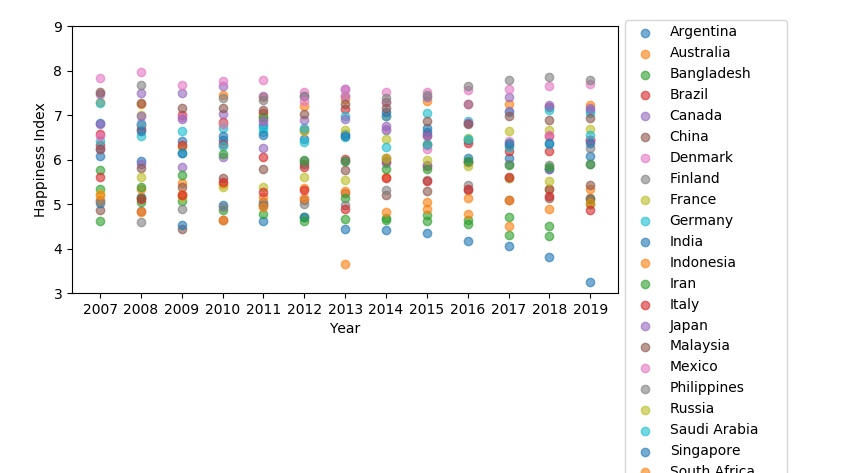

In [26]:
for i in range(0, len(df)):
    plt.scatter(year, data_list[i], alpha= 0.6)
    plt.legend(country_name, bbox_to_anchor = (1,1.05) )
    
plt.xlabel("Year")
plt.ylabel("Happiness Index")
plt.ylim(3,9)
plt.tight_layout()



### 3.2 Interactive Plot with Bokeh

In [62]:
#Transpose the df
df_path = f"../Data sets/Raw Data/Happiness Score/Happiness_2005_2019.csv"
df = pd.read_csv(df_path)
#We will drop Oman because there are too many NaN

df = df.drop(index = 17)
df = df.drop(columns=["2005", "2006"])
#df = df. fillna(value = "")
# Country is in the column. We want them as index
df = df.set_index("Country name")
df_t = df.transpose()

df_t

Country name  Argentina  Australia  Bangladesh  Brazil  Canada  China  \
2007               6.07       7.29        4.61    6.32    7.48   4.86   
2008               5.96       7.25        5.05    6.69    7.49   4.85   
2009               6.42        NaN        5.08    7.00    7.49   4.45   
2010               6.44       7.45        4.86    6.84    7.65   4.65   
2011               6.78       7.41        4.99    7.04    7.43   5.04   
2012               6.47       7.20        4.72    6.66    7.42   5.09   
2013               6.58       7.36        4.66    7.14    7.59   5.24   
2014               6.67       7.29        4.64    6.98    7.30   5.20   
2015               6.70       7.31        4.63    6.55    7.41   5.30   
2016               6.43       7.25        4.56    6.37    7.24   5.32   
2017               6.04       7.26        4.31    6.33    7.41   5.10   
2018               5.79       7.18        4.50    6.19    7.18   5.13   
2019               6.09       7.23        5.11    6.45    7.11   5.14   

Country name  Denmark  Finland  France  Germany  ...  Mexico  Philippines  \
2007             7.83      NaN     NaN     6.42  ...    6.53         5.07   
2008             7.97     7.67    7.01     6.52  ...    6.83         4.59   
2009             7.68      NaN    6.28     6.64  ...    6.96         4.88   
2010             7.77     7.39    6.80     6.72  ...    6.80         4.94   
2011             7.79     7.35    6.96     6.62  ...    6.91         4.99   
2012             7.52     7.42    6.65     6.70  ...    7.32         5.00   
2013             7.59     7.44    6.67     6.97  ...    7.44         4.98   
2014             7.51     7.38    6.47     6.98  ...    6.68         5.31   
2015             7.51     7.45    6.36     7.04  ...    6.24         5.55   
2016             7.56     7.66    6.48     6.87  ...    6.82         5.43   
2017             7.59     7.79    6.64     7.07  ...    6.41         5.59   
2018             7.65     7.86    6.67     7.12  ...    6.55         5.87   
2019             7.69     7.78    6.69     7.04  ...    6.43         6.27   

Country name  Russia  Saudi Arabia  Singapore  South Africa  South Korea  \
2007            5.22          7.27       6.83          5.20         5.77   
2008            5.62          6.81       6.64          5.35         5.39   
2009            5.16          6.15       6.14          5.22         5.65   
2010            5.38          6.31       6.53          4.65         6.12   
2011            5.39          6.70       6.56          4.93         6.95   
2012            5.62          6.40        NaN          5.13         6.00   
2013            5.54          6.50       6.53          3.66         5.96   
2014            6.04          6.28       7.06          4.83         5.80   
2015            6.00          6.35       6.62          4.89         5.78   
2016            5.85          6.47       6.03          4.77         5.97   
2017            5.58          6.29       6.38          4.51         5.87   
2018            5.51          6.36       6.37          4.88         5.84   
2019             NaN          6.56       6.38          5.03         5.90   

Country name  Turkey  United Kingdom  United States  
2007            5.62            6.80           7.51  
2008            5.12            6.99           7.28  
2009            5.21            6.91           7.16  
2010            5.49            7.03           7.16  
2011            5.27            6.87           7.12  
2012            5.31            6.88           7.03  
2013            4.89            6.92           7.25  
2014            5.58            6.76           7.15  
2015            5.51            6.52           6.86  
2016            5.33            6.82           6.80  
2017            5.61            7.10           6.99  
2018            5.19            7.23           6.88  
2019            4.87            7.16           6.94  

[13 rows x 26 columns]

In [33]:
#Store data with ColumnDataSource
Country_happiness = ColumnDataSource(df)


p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for data, name, color in zip([ data_list[0], data_list[1], data_list[2]], ["Argentina", "Australia", "Bangladesh"], Spectral4):
    df2 = pd.DataFrame(data)
    df2['date'] = pd.to_datetime(year)
    p.line(df2['date'], df2['close'], line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()